<a href="https://colab.research.google.com/github/gonzalo-marrero/solar_polytropic_model/blob/main/ModPolSol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desarrollo del código para la resolución del modelo politrópico del sol.

In [ ]:
pip install astropy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from astropy.io.ascii import read

In [1]:
!pip freeze > requirements.txt


## Apartado 1.
Resolver la ecuacion de Lane-Emden para n = 0, n = 0.5, n =1, n= 1.5, n = 2, n = 2.5, n = 3,
n = 3.5, n = 4, n = 4.5 y n = 5. Representar los resultados.

In [ ]:
import numpy as np

In [ ]:
%pylab inline
import seaborn as sns
sns.set_palette("magma", 8)

Populating the interactive namespace from numpy and matplotlib


El valor para el índice politrópico 0.01 en el que theta se hace cero es: 2.450
El valor de dTheta/dxi, evaluado en xi1 es = -0.801
Dn vale 1.0191166968659697
Mn vale 4.81067767434658
El valor para el índice politrópico 0.5 en el que theta se hace cero es: 2.750
El valor de dTheta/dxi, evaluado en xi1 es = -0.495
Dn vale 1.8514872272244958
Mn vale 3.7445831881648983
El valor para el índice politrópico 1 en el que theta se hace cero es: 3.140
El valor de dTheta/dxi, evaluado en xi1 es = -0.315
Dn vale 3.321956490150673
Mn vale 3.1068139178423326
El valor para el índice politrópico 1.5 en el que theta se hace cero es: 3.650
El valor de dTheta/dxi, evaluado en xi1 es = -0.202
Dn vale 6.035160543500092
Mn vale 2.6859888542029315
El valor para el índice politrópico 2 en el que theta se hace cero es: 4.360
El valor de dTheta/dxi, evaluado en xi1 es = -0.126
Dn vale 11.569904838492354
Mn vale 2.388021917432904
El valor para el índice politrópico 2.5 en el que theta se hace cero es: 5.370
El v

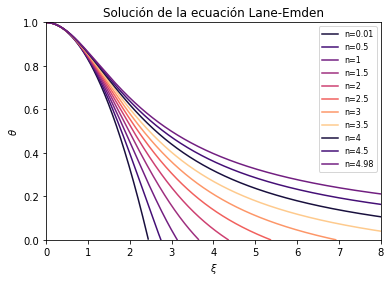

In [ ]:
thetaN =[0.01,0.5,1,1.5,2,2.5,3,3.5,4,4.5, 4.98] # Defino el rango de n que quiero plotear (n=0.0, 1.0, 1.5, 2.0, 3.0, 5.0)
dxi = 0.01 # Delta de la integración
N = 1284 #Nº de bins
for n in thetaN: #Se recorre el array donde tenemos el índice politrópico n
  xi = 0.0001 # Se empieza con un valor inicial muy próximo a cero
  theta = 1.0 # Se da un valor de theta inicial de 1.0
  f1 = 0.0 # Se da un valor inicial a f1 de
  theta_sol = [] # Se crea una lista vacía para almacenar la variable theta
  xi_sol = [] # Se crea una lista vacía para almacenar la variable xi
  for i in range(N):  # Se implementa el bucle para que realice el calculo para el número N de bins
    f1 += -xi**2*theta**(n)*dxi # Se calcula la función f1, y se va sumando en cada iteración
    theta += f1/xi**2*dxi # Se Calcula theta para y se va sumando hasta cada iteración
    xi += dxi # Se incrementa el valor inicial en base al delta dxi.
    if theta<0: # Se dispone un if para indicar que termine de almacenar cuando theta sea < 0
      print("El valor para el índice politrópico", str(n), "en el que theta se hace cero es:", "{0:.3f}".format(xi))
      print("El valor de dTheta/dxi, evaluado en xi1 es =", "{0:.3f}".format(f1*xi**-2))
      print("Dn vale", str(-(((3/xi)*(f1*xi**-2)))**(-1)))
      print("Mn vale", str(-f1))
      break
    else:
      theta_sol.append(theta) # Se va almacenando cada resultado en una lista, para luego representar (Eje Y)
      xi_sol.append(xi) # Se almacena el resultado xi en xi_sol, para representar (Eje X).

  plot(xi_sol,theta_sol, label ='n=' +str(n))
  legend(loc="upper right")
  rc('legend', fontsize=8)
title("Solución de la ecuación Lane-Emden")
xlabel(r'$\xi$')
ylabel(r'$\theta$')
xlim(0,8)
ylim(0,1)
show()



## Apartado 2:
Casos donde se han encontrado soluciones analíticas. Comparar con las derivaciones numéricas. De esta manera se comprueba la precisión de los cálculos.

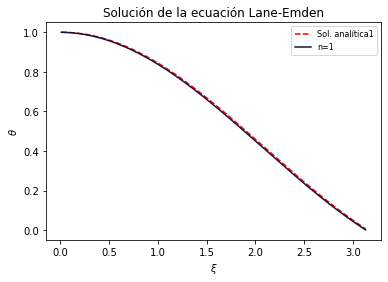

In [ ]:
  #n=0 #Indice n
  n=1
  dxi = 0.01 # deltaX
  xi = 0.0001 # Se empieza con un valor inicial muy próximo a cero
  theta = 1.0 # Se da un valor de theta inicial de 1.0
  f1 = 0.0 # Se da un valor inicial a f1 de
  theta_sol = [] # Se crea una lista vacía para almacenar la variable theta
  theta_an = []
  theta_2 = 1.0
  xi_sol = [] # Se crea una lista vacía para almacenar la variable xi
  for i in range(N):  # Se implementa el bucle para que realice el calculo para el número N de bins
    f1 += -xi**2*theta**(n)*dxi # Se calcula la función f1, y se va sumando en cada iteración
    theta += f1/xi**2*dxi # Se Calcula theta para y se va sumando hasta cada iteración
    theta_2 = np.sin(xi)/xi
    #theta_2 = 1-((xi**2)/6)
    xi += dxi # Se incrementa el valor inicial en base al delta dxi.

    if theta <0 or theta_2<0: # Se dispone un if para indicar que termine de almacenar cuando theta sea < 0
      break
    else:
      theta_sol.append(theta) # Se va almacenando cada resultado en una lista, para luego representar (Eje Y)
      xi_sol.append(xi) # Se almacena el resultado xi en xi_sol, para representar (Eje X).
      theta_an.append(theta_2)
  plot(xi_sol,theta_an, linestyle ="dashed", color ='red', label ='Sol. analítica' + str(n))
  plot(xi_sol,theta_sol, label ='n=' +str(n))
  legend(loc="upper right")
  rc('legend', fontsize=8)
title("Solución de la ecuación Lane-Emden")
xlabel(r'$\xi$')
ylabel(r'$\theta$')
#xlim(1,1.2)
#ylim(0,1)
show()

## Apartado 4:




### Variables de interés

In [ ]:
rhoc = 78.059 #g/cm3
alpha = 1.0043*10**10 #cm
Nindex = 3 #indice politropico para el Sol
G = 6.67430*10**(-8) #dyn cm2 / g2
K = 5.15*10**14
Rgases = 8.2497*10**7 #Constante gases en erg/K g
Rs = 6.96*10**10 #Radio solar en cm
Ms = 1.99*10**33 #Masa solar en g
mu = 0.61
gamma = 1+(1/3)

### Modelo sofisticado Batchall

In [ ]:
# Se carga los datos del modelo Batchall.
myfile = read('Batchall.txt')

In [ ]:
# Se leen las columnas que queremos graficar.
xx = myfile['R/Rsun'] #R/Rsolar
yy = myfile['Rho'] #Rho Densidad (g/cm3)
zz = myfile['P'] #Presión (dyn/cm2)
aa = myfile['T'] #Temperatura (K)
bb = myfile['M/Msun'] #M/Msolar

In [ ]:
#Conversiones:
logden = np.log10(yy)
logPres = np.log10(zz)
logTemp = np.log10(aa)

In [ ]:
logPres

### Cálculos para polítropo n = 3


<ipython-input-302-1a966843ce97>:28: RuntimeWarning: invalid value encountered in double_scalars
  Pres1 = np.log10(K*(Rho1)**gamma) + 2
<ipython-input-302-1a966843ce97>:27: RuntimeWarning: invalid value encountered in log10
  Rho1 = np.log10(rhoc*theta**n)


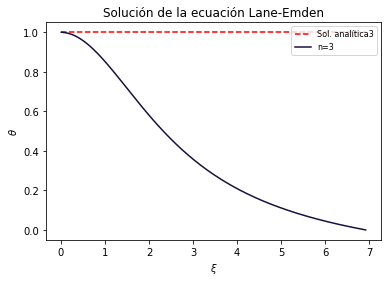

In [ ]:
  #n=0 #Indice n

  space = 1284
  n=3
  dxi = 0.01 # deltaX
  xi = 0.0001 # Se empieza con un valor inicial muy próximo a cero
  theta = 1.0 # Se da un valor de theta inicial de 1.0
  f1 = 0.0 # Se da un valor inicial a f1 de
  theta_sol = [] # Se crea una lista vacía para almacenar la variable theta
  theta_an = []
  theta_2 = 1.0
  xi_sol = [] # Se crea una lista vacía para almacenar la variable xi
  Mctes =-4*np.pi*(alpha**3)*rhoc #Elementos constantes para el cálculo de la masa
  Mini = 0 # Valor inicial para la masa
  MList = [] # Array para almacenar las masas
  Rho1 = 0
  RhoArray = []
  Pres1 = 0
  PressArray = []
  Tcero = 0
  Tarray = []
  for i in range(space):  # Se implementa el bucle para que realice el calculo para el número N de bins
    f1 += -xi**2*theta**(n)*dxi # Se calcula la función f1, y se va sumando en cada iteración
    theta += f1/xi**2*dxi # Se Calcula theta para y se va sumando hasta cada iteración
    #theta_2 = np.sin(xi)/xi
    Mini = (Mctes*f1)/Ms
    Rho1 = np.log10(rhoc*theta**n)
    Pres1 = np.log10(K*(Rho1)**gamma) + 2
    Tcero = -(np.log10((Pres1*mu)/(Rgases*Rho1)))
    #theta_2 = 1-((xi**2)/6)
    xi += dxi # Se incrementa el valor inicial en base al delta dxi.
    if theta<0: # Se dispone un if para indicar que termine de almacenar cuando theta sea < 0
      break
    else:
      theta_sol.append(theta) # Se va almacenando cada resultado en una lista, para luego representar (Eje Y)
      xi_sol.append(xi) # Se almacena el resultado xi en xi_sol, para representar (Eje X).
      MList.append(Mini) #Se almacena dato de la masa en una lista
      RhoArray.append(Rho1)
      PressArray.append(Pres1)
      Tarray.append(Tcero)
      theta_an.append(theta_2)
  plot(xi_sol,theta_an, linestyle ="dashed", color ='red', label ='Sol. analítica' + str(n))
  plot(xi_sol,theta_sol, label ='n=' +str(n))
  legend(loc="upper right")
  rc('legend', fontsize=8)
title("Solución de la ecuación Lane-Emden")
xlabel(r'$\xi$')
ylabel(r'$\theta$')
#xlim(1,1.2)
#ylim(0,1)
show()

In [ ]:
len(Tarray)

692

In [ ]:
thetaprueba = np.linspace(0,1,1284)
i= 0
rhoList=[]
rhof = 0
Pini = 0
PList = []
TList =[]
Tini = 0
for index in thetaprueba:
  rhof = np.log10(rhoc*thetaprueba[i]**n)
  Pini = np.log10(K*(rhof)**gamma)
  Tini = - (np.log10((Pini*mu)/(Rgases*rhof)))
  i += 1
  rhoList.append(rhof)
  PList.append(Pini)
  TList.append(Tini)
  #print(str(rhof))

rhoList.reverse()
PList.reverse()
TList.reverse()

<ipython-input-253-47112b31b6da>:12: RuntimeWarning: divide by zero encountered in log10
  rhof = np.log10(rhoc*thetaprueba[i]**n)
<ipython-input-253-47112b31b6da>:14: RuntimeWarning: invalid value encountered in double_scalars
  Tini = - (np.log10((Pini*mu)/(Rgases*rhof)))
<ipython-input-253-47112b31b6da>:13: RuntimeWarning: invalid value encountered in double_scalars
  Pini = np.log10(K*(rhof)**gamma)


In [ ]:
gamma

1.3333333333333333

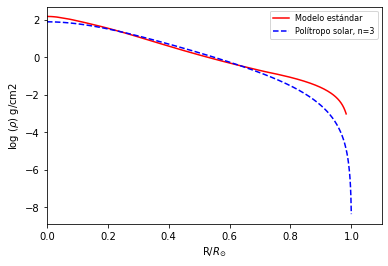

In [ ]:
#Density Modelo vs. Polítropo
xx2 = np.linspace(0,1,692)
plot(xx,logden, color ='r', linestyle ='solid', label = "Modelo estándar")
plot(xx2, RhoArray, color ='b', linestyle ='dashed', label ='Polítropo solar, n=' +str(n))
xlim(0,1.1)
#invert_xaxis()
#ylim(-10,3)
legend(loc="upper right")
rc('legend', fontsize=8)
xlabel(r'R/$R_{\odot}$')
ylabel(r'log ($\rho$) g/cm2')
show()

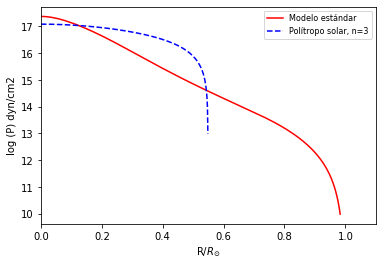

In [ ]:
#Presión vs. Polítropo
xx2 = np.linspace(0,1,692)
plot(xx,logPres, color ='r', linestyle ='solid', label = "Modelo estándar")
plot(xx2, PressArray, color ='b', linestyle ='dashed', label ='Polítropo solar, n=' +str(n))
xlim(0,1.1)
#invert_xaxis()
#ylim(-10,3)
legend(loc="upper right")
rc('legend', fontsize=8)
xlabel(r'R/$R_{\odot}$')
ylabel(r'log (P) dyn/cm2')
show()

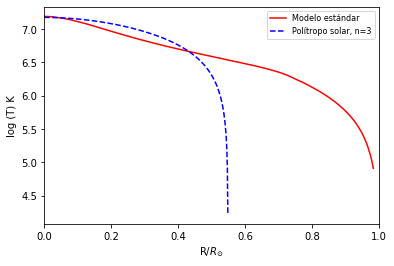

In [ ]:
#Temperatura vs. Polítropo
xx2 = np.linspace(0,1,692)
plot(xx,logTemp, color ='r', linestyle ='solid', label = "Modelo estándar")
plot(xx2, Tarray, color ='b', linestyle ='dashed', label ='Polítropo solar, n=' +str(n))
xlim(0,1)
#invert_xaxis()
#ylim(-10,3)
legend(loc="upper right")
rc('legend', fontsize=8)
xlabel(r'R/$R_{\odot}$')
ylabel(r'log (T) K')
show()

<ipython-input-282-19b7da34030a>:8: MatplotlibDeprecationWarning: Unrecognized location 'down right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend(loc="down right")


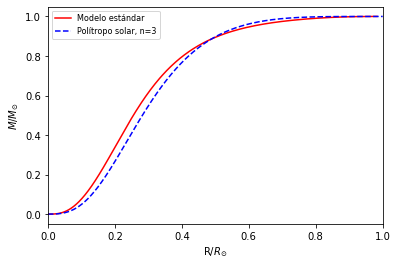

In [ ]:
#Masa vs. Polítropo
xx2 = np.linspace(0,1,692)
plot(xx,bb, color ='r', linestyle ='solid', label = "Modelo estándar")
plot(xx2, MList, color ='b', linestyle ='dashed', label ='Polítropo solar, n=' +str(n))
xlim(0,1)
#invert_xaxis()
#ylim(-10,3)
legend(loc="down right")
rc('legend', fontsize=8)
xlabel(r'R/$R_{\odot}$')
ylabel(r'$M/M_{\odot}$')
show()